# Data Science 100 - Group Project (Individual Portion)

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#read in players data
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


### (2) - Questions

This is the *players* dataset, which includes 196 rows, and 7 variables. These 7 variables include:

- **experience** (chr) &rarr; The expereince level of a player (Pro, Veteran, Beginner, Amateur, Regular)

- **subscribe** (lgl) &rarr; Whether a player is subscribed or not (TRUE/FALSE) 

- **hasedEmail** (chr) &rarr; the email each player uses 

- **played_hours** (dbl) &rarr; The number of hours played by each player 

- **name** (chr) &rarr; Each player's name 

- **gender** (chr) &rarr; Player's gender (Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say, Other) 

- **Age** (dbl) &rarr; Player's age

With a closer analysis, 2 main issues arise. The first issue is several players seem to have a *played_hours* observation of 0.0, which is problematic because played_hours is a crucial variable that can help us determine if players enjoy the game, and it can also help us identify the target audience of the game (the age group with the highest playing time is possibly the target audience). The second issue is that some of the played_hours observations are way too high compared to other times. This is problematic because this can cause bias or misclassification by classification or regression models. 

The broad question I will adress is **"We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts."** Since this question is interested in players contributing to large amounts of data, I can try to determine the characteristic(s) of players who have the most playing time, since they are the ones that will contribute to large amounts of data. So I will specifically address the question, **"Does age, gender, and experience predict played_hours in *players* dataset?"**. 

I will address my specific question by selecting the "age", "gender", "experience", and "played_hours" variables. I will then determine the three most popular "experience" levels and filter them. Finally, I will make a regression model, that will predict the "played_hours" based on a players age, experience, and gender. 

### (3) - Data Visualization

In [4]:
#select the required variables
players_2 <- players |>
            select(experience, gender, Age, played_hours)
players_2

experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Pro,Male,9,30.3
Veteran,Male,17,3.8
Veteran,Male,17,0.0
Amateur,Female,21,0.7
⋮,⋮,⋮,⋮
Veteran,Male,22,0.3
Amateur,Prefer not to say,57,0.0
Amateur,Male,17,2.3
Pro,Other,NA,0.2


Above, we wrangled the data to include only the variables we are interested in. Additionally, our data is tidy because each column is one variable, each row is one observation, and each cell is a single value. 

In [5]:
#calculate the mean of the dbl variables (Age, played_hours)
players_specific <- players_2 |>
                    summarize(age_mean = mean(Age, na.rm = TRUE), played_hours_mean = mean(played_hours, na.rm = TRUE))
players_specific

age_mean,played_hours_mean
<dbl>,<dbl>
21.13918,5.845918


From the above wrangling, we conclude that the average age of a player is 21, and that the avergae playing time is 5.85 hours. Keep in mind is that, some of the variables in the played_hours column were very high compared to the rest, which would make the overall average higher. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


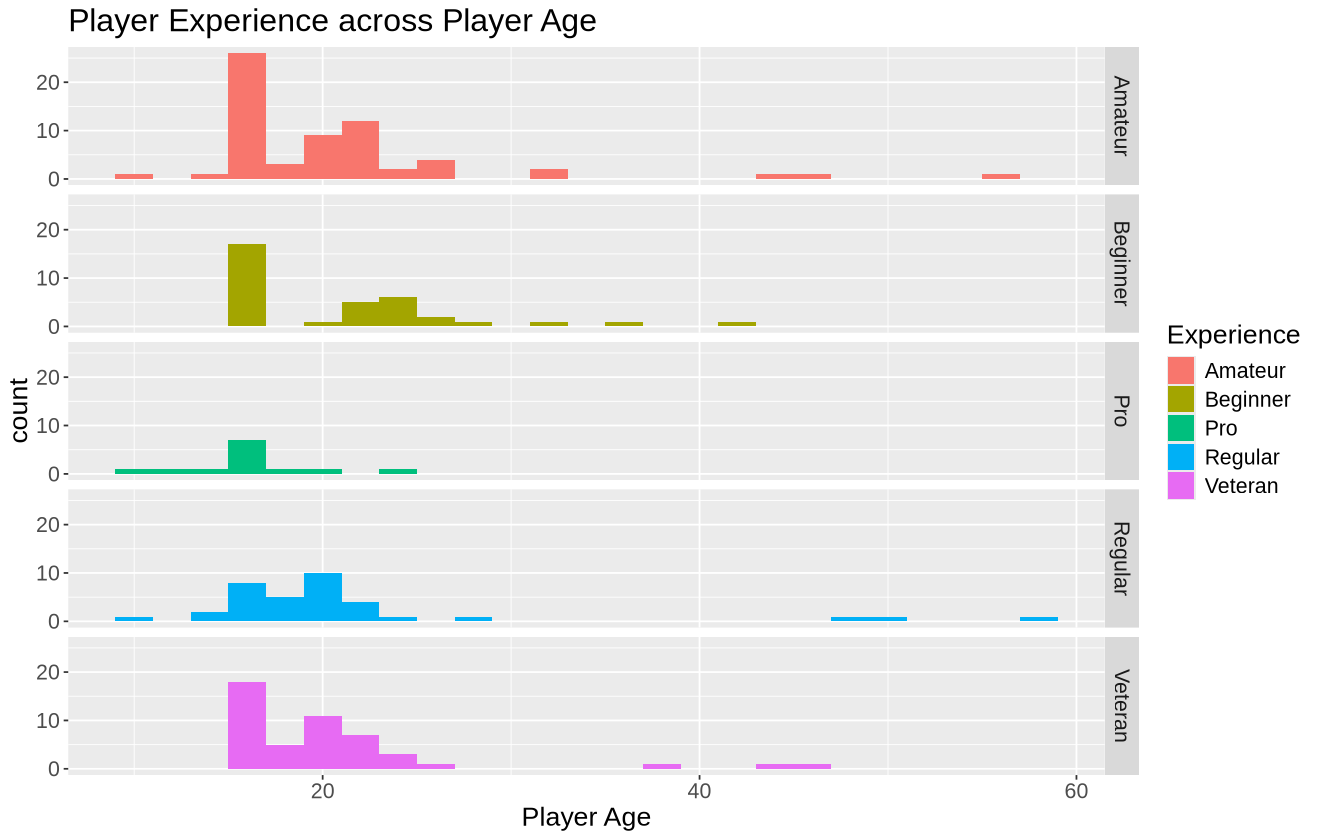

In [6]:
#make a histogram to see the experience of players in each age-group

options(repr.plot.width = 11, repr.plot.length = 15)

age_vs_experience_histogram <- players_2 |>
                            ggplot(aes(x = Age, fill = as.factor(experience)))+
                            geom_histogram(binwidth = 2, position = "identity")+
                            facet_grid(rows = vars(experience))+
                            labs(x = "Player Age", title = "Player Experience across Player Age", fill = "Experience")+
                            theme(text = element_text(size = 16))+
                            scale_color_brewer(palette = "Set2")

age_vs_experience_histogram

The above graph shows that most players are within 15-25 years of age, and that most players are either amateurs, veterans, or beginners. This tells us that we can use filter() our data to include players with amateur, beginner, or veteran experiences.

In [7]:
#filter data to include only veteran, amateur, and beginner player experience data
players_filtered <- players_2 |>
                    filter(experience == "Amateur" | experience == "Beginner" | experience == "Veteran")
players_filtered

experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Veteran,Male,17,3.8
Veteran,Male,17,0.0
Amateur,Female,21,0.7
Amateur,Female,17,0.0
⋮,⋮,⋮,⋮
Amateur,Female,17,0.0
Veteran,Male,22,0.3
Amateur,Prefer not to say,57,0.0
Amateur,Male,17,2.3


Originally there were 196 rows, but now there are 146, which means that 50 players had pro or regular experience. .

In [8]:
#filter experience to determine number of amateur players
amateur_count <- players_2 |>
                 filter(experience == "Amateur")
amateur_count


#filter experience to determine number of veteran players
veteran_count <- players_2 |>
                  filter(experience == "Veteran")
veteran_count


#filter experience to determine number of beginner players
beginner_count <- players_2 |>
                  filter(experience == "Beginner")
beginner_count

experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Amateur,Female,21,0.7
Amateur,Female,17,0.0
Amateur,Male,21,0.0
Amateur,Male,47,0.1
⋮,⋮,⋮,⋮
Amateur,Male,20,0.0
Amateur,Female,17,0.0
Amateur,Prefer not to say,57,0.0
Amateur,Male,17,2.3


experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Veteran,Male,17,3.8
Veteran,Male,17,0.0
Veteran,Female,22,0.0
Veteran,Female,23,1.6
⋮,⋮,⋮,⋮
Veteran,Non-binary,21,2.7
Veteran,Non-binary,17,0.1
Veteran,Female,44,0.1
Veteran,Male,22,0.3


experience,gender,Age,played_hours
<chr>,<chr>,<dbl>,<dbl>
Beginner,Female,25,1.5
Beginner,Female,17,0.0
Beginner,Male,17,1.0
Beginner,Male,17,0.0
⋮,⋮,⋮,⋮
Beginner,Male,24,0.0
Beginner,Female,17,0.3
Beginner,Male,32,1.8
Beginner,Female,17,0.0


From the above filtering, we confirm that we have 63 amateur players, 48 veteran players, and 35 beginners.

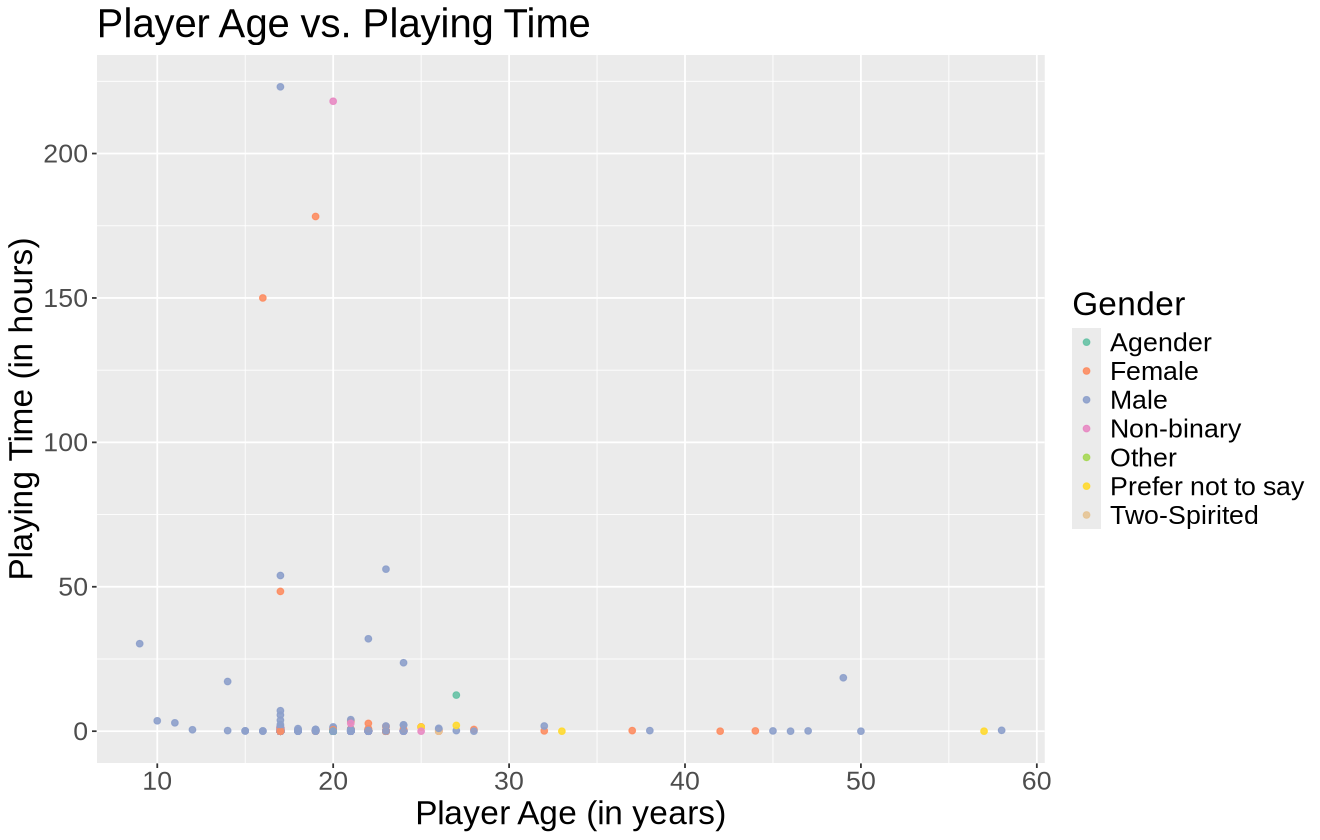

In [11]:
options(repr.plot.width = 11, repr.plot.length = 9)

#plot age vs. played_hours
age_vs_played_hours_plot <- players_2 |>
                            ggplot(aes(x = Age, y = played_hours, color = gender))+
                            geom_point(alpha = 0.9, na.rm = TRUE)+
                            labs(x = "Player Age (in years)", y = "Playing Time (in hours)", color = "Gender", title = "Player Age vs. Playing Time")+
                            theme(text = element_text(size = 20))+
                            scale_color_brewer(palette = "Dark2")
age_vs_played_hours_plot

The above scatter plot does not have a scaled y-axis, making it not representative of the relationship we are looking for, since all the points are very close together.

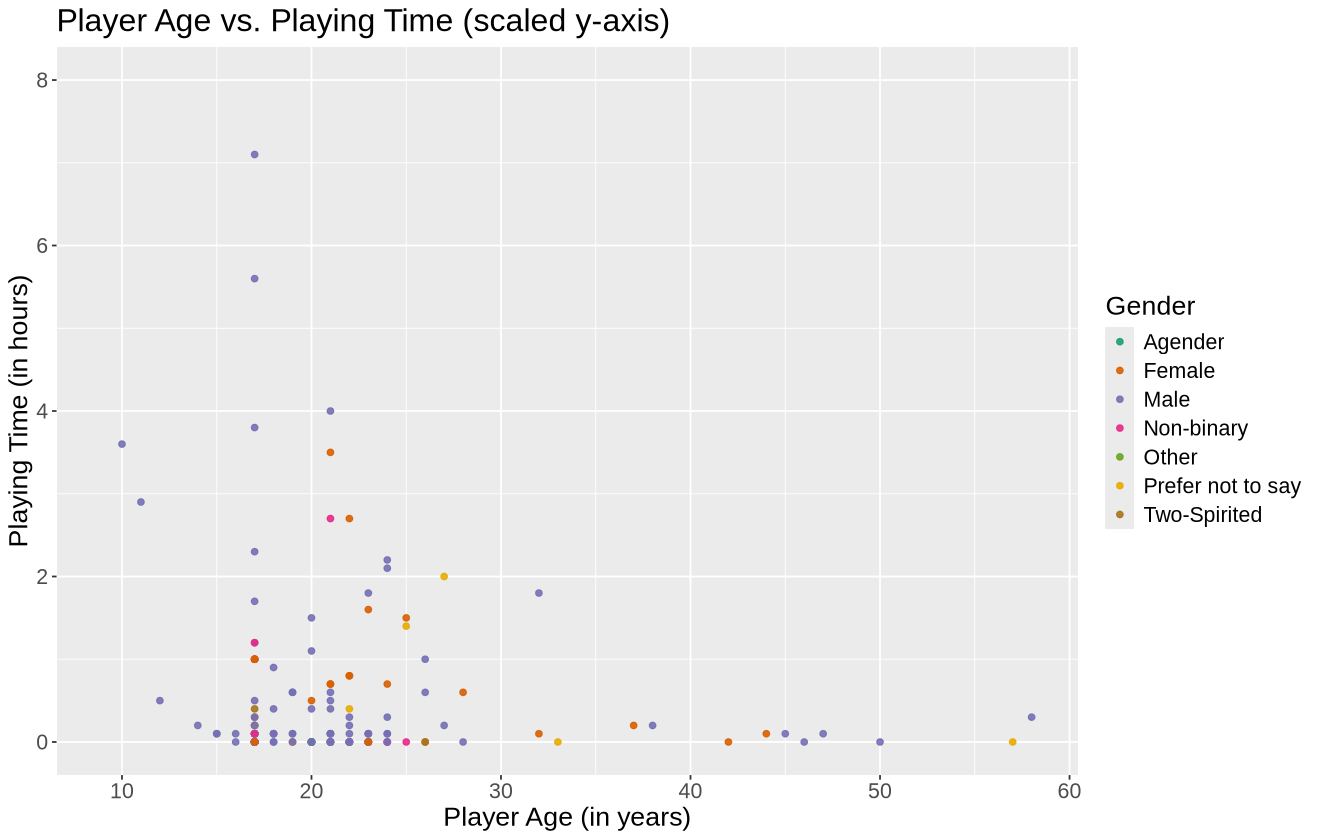

In [10]:
options(repr.plot.width = 11, repr.plot.length = 9)

#plot age vs. played_hours (scaled y-axis)
age_vs_played_hours_plot_scale <- players |>
                                ggplot(aes(x = Age, y = played_hours, color = gender))+
                                geom_point(alpha = 0.9, na.rm = TRUE)+
                                labs(x = "Player Age (in years)", y = "Playing Time (in hours)", color = "Gender", title = "Player Age vs. Playing Time (scaled y-axis)")+
                                ylim(0,8)+
                                theme(text = element_text(size = 16))+
                                scale_color_brewer(palette = "Dark2")
age_vs_played_hours_plot_scale

In the above scater plot, we see that most players play between 0-2 hours, and are male. One thing to note is that the scaling of the y-axis is on-purpose because the played_hours values are small compared to player_age. 

### (4) - Methods & Plan

Since I want to predict the number of hours a new player will play, I will need to use a regression model, which is appropriate because **played_hours** is a numeric variable (dbl). To apply this method we need to assume that all incoming players will play at least 0.1 hours (since that is the lowest value seen in the data table). 

A potential limitation, however, is that the scatter plot (which the regression model will use) is only "non-biased" for ages between 15-25 because there are several data points it can use as neighbors. However, as we get farther from an age of 30, there are not many neighbors that can be used, and hence, the predicted value might not be as accurate.

Since I will use regression, I will first split my data (using **initial_split**) into 70% training set and 30% test set. I will then perform a 5-fold-cross-validation to determine the best K, which will be the one that has the lowest RMSPE. To perform cross-validation I will first make my model (**knn_spec**), then make my recipe (**knn_recipe**), then perform the cross validation (using **vfold_cv**), then fit my data (**knn_fit**). After the data is fitted, we can use it to predict played_hours.